## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

0. Environment.
1. Check libraries version.
2. Import Libraries.
3. Question or problem definition.
4. Acquire dataset or training and testing data.
5. Analyze, identify patterns, and explore the data.

6. **Wrangle, prepare, cleanse the data.**
7. Feature Engineering
8. Model, predict and solve the problem.
9. Visualize, report, and present the problem solving steps and final solution.
10. Create or solve AI pipeline on Cloud, architecture solution and shows results.

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

## 2a Part - Wrangle and Cleanse data - categorical features

***

## Import Libraries and modules

We create grouping for different libraries and modules per workflow block or step.

In [1]:
#!pip install sklearn_pandas
#!pip install -U scikit-learn

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
from sklearn.impute import  KNNImputer, MissingIndicator, SimpleImputer
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier)

## Load metrics for predictive modeling

from sklearn.model_selection import cross_val_score


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.6 (default, Dec 30 2019, 19:38:36)  [Clang 10.0.0 (clang-1000.11.45.5)]
executable: /usr/local/opt/python/bin/python3.7
   machine: Darwin-17.7.0-x86_64-i386-64bit

Python dependencies:
       pip: 20.0.2
setuptools: 42.0.2
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


***

## Load dataset from 1_EDA part

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [4]:
data_1 = pd.read_csv("df_eda_1.csv")
data_2 = pd.read_csv("df_eda_2.csv")
dataset = [data_1, data_2]

In [5]:
data_1.head(10)

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House,new_PhoneCallDay
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban,Wednesday
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic,Thursday
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban,Thursday
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban,Wednesday
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
5,6,1,NaN,MOBILE PHONE,1,2009,6,2,2,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
6,7,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,None,Low,10571.08986,0.000,NaN,NaN,NaN,NaN,Rustic,Tuesday
7,8,0,NaN,FIXED / LAND PHONE,0,1995,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
8,9,0,NaN,FIXED / LAND PHONE,0,2011,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
9,10,0,NaN,MOBILE PHONE,0,2009,2,0,0,14.50,...,None,Low,11784.06666,0.000,NaN,NaN,NaN,NaN,Urban,Sunday


In [6]:
data_2.head(10)

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,MOBILE PHONE,1,2011,6,0,1,1972.0,Medium,...,32249.357096,None,Low,14696.223762,0.00000,NaN,NaN,NaN,NaN,Urban
6,7,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1964.0,Low,...,111937.870696,two,Medium,51269.683362,0.00000,3.0,0.0,1.0,0.0,Urban
7,8,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Low,...,15454.440296,None,Low,6988.108962,0.00000,NaN,NaN,NaN,NaN,Rustic
8,9,NaN,FIXED / LAND PHONE,0,1998,26,0,3,NaN,Medium,...,20437.310696,None,Low,9275.023362,0.00000,NaN,NaN,NaN,NaN,Urban
9,10,6.0,MOBILE PHONE,0,2013,2,0,0,1971.0,High,...,15675.808296,None,Low,7089.706962,0.00000,NaN,NaN,NaN,NaN,Urban


***

## 5. Cleanse, Wrangle, Prepare the data and Feature Engineering

### 5.1 Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data. 

we will focus on 6 popular ways for data imputation for cross-sectional datasets:

* Do Nothing
* Imputation Using (Mean/Median) Values
* Imputation Using (Most Frequent) or (Zero/Constant) Values
* Imputation Using k-NN
* Imputation Using Multivariate Imputation by Chained Equation (MICE)
* Imputation Using Deep Learning (Datawig)

We can check all of them and evaluate model combining each step described before.

#### a. Do Nothing

That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.

#### b. Imputation Using (Mean/Median) Values:

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

*Pros*:
Easy and fast.
Works well with small numerical datasets.

*Cons*:
Doesn’t factor the correlations between features. It only works on the column level.
Will give poor results on encoded categorical features (do NOT use it on categorical features).
Not very accurate.
Doesn’t account for the uncertainty in the imputations

#### c. Imputation Using (Most Frequent) or (Zero/Constant) Values

Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

*Pros*:
Works well with categorical features.

*Cons*:
It also doesn’t factor the correlations between features.
It can introduce bias in the data.

#### d. Imputation Using k-NN:

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. Let’s see some example code using Impyute library which provides a simple and easy way to use KNN for imputation:

*Pros*:
Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).

*Cons*:
Computationally expensive. KNN works by storing the whole training dataset in memory.
K-NN is quite sensitive to outliers in the data (unlike SVM)

#### e. Imputation Using Multivariate Imputation by Chained Equation (MICE)

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. For more information on the algorithm mechanics, you can refer to the Research Paper

#### f. Imputation Using Deep Learning (Datawig):

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

*Pros*:
Quite accurate compared to other methods.
It has some functions that can handle categorical data (Feature Encoder).
It supports CPUs and GPUs.

*Cons*:
Single Column imputation.
Can be quite slow with large datasets.
You have to specify the columns that contain information about the target column that will be imputed.


#### Other Imputation Methods:

##### Stochastic regression imputation:
It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset plus some random residual value.

##### Extrapolation and Interpolation:
It tries to estimate values from other observations within the range of a discrete set of known data points.

##### Hot-Deck imputation:
Works by randomly choosing the missing value from a set of related and similar variables.


***

## Missing values and Imputation - stage 1

All variables with more >70% of missing values are dropped. We impute the others. Maybe is worst approach to impute missing values, so, we divide this task in two parts:
- remove missing values
- impute missing values

In [7]:
# Check null and NA values for both dataset by frequency first and absolute values after

for i in dataset:
    lista = []
    lista.append(i.isna().sum()/len(i)*100)
    print(lista)
    print("*-"*20)

[Obs                                 0.000
Sales                               0.000
Price Sensitivity                  92.625
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid           91.425
Socieconomic Status                 9.920
Province                           10.760
Right Address                       9.920
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                     

### Check data type for missing variables

In [8]:
dataset[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obs                              20000 non-null  int64  
 1   Sales                            20000 non-null  int64  
 2   Price Sensitivity                1475 non-null   float64
 3   PhoneType                        20000 non-null  object 
 4   Email                            20000 non-null  int64  
 5   Tenure                           20000 non-null  int64  
 6   NumberofCampaigns                20000 non-null  int64  
 7   ProdActive                       20000 non-null  int64  
 8   ProdBought                       20000 non-null  int64  
 9   Premium Offered                  20000 non-null  float64
 10  Phone Call Day                   20000 non-null  object 
 11  CodeCategory                     20000 non-null  object 
 12  Birthdate         

In [9]:
# using dropna() function     
dataset[0].dropna(how = 'all') 

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House,new_PhoneCallDay
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban,Wednesday
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic,Thursday
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban,Thursday
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban,Wednesday
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,NaN,FIXED / LAND PHONE,0,2013,2,0,0,14.50,...,None,Low,14420.22726,44352.684,1.0,2.0,0.0,0.0,Rustic,Thursday
19996,19997,0,NaN,FIXED / LAND PHONE,0,2013,2,0,0,14.50,...,None,Low,9818.55126,0.000,NaN,NaN,NaN,NaN,Urban,Friday
19997,19998,0,NaN,FIXED / LAND PHONE,0,2009,4,0,1,14.50,...,None,Low,15079.08906,46377.495,3.0,0.0,1.0,1.0,Urban,Monday
19998,19999,0,NaN,FIXED / LAND PHONE,0,2012,4,0,0,14.50,...,two,Low,30754.50426,94550.706,1.0,1.0,1.0,0.0,Urban,Monday


> Dataset[0] hasn't null values per row!

In [10]:
# using dropna() function     
dataset[1].dropna(how = 'all')

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,MOBILE PHONE,0,2012,2,0,0,1947.0,Medium,...,33368.793096,None,Low,15209.994762,46271.82132,1.0,1.0,1.0,0.0,Urban
9996,9997,NaN,FIXED / LAND PHONE,0,2012,4,0,0,NaN,Low,...,22729.300296,None,Low,10326.943962,0.00000,NaN,NaN,NaN,NaN,Rustic
9997,9998,NaN,MOBILE PHONE,0,2012,2,0,0,NaN,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,NaN,MOBILE PHONE,0,2012,2,0,0,NaN,Low,...,14379.438696,None,Low,6494.731362,51849.99432,NaN,NaN,NaN,NaN,Urban


> Either Dataset[1] hasn't null values per row!

### Drop variables > 70% missing values

In this first part we drop variable with more 70% missing values

In [11]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [12]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 21 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Semesters Paid,634,18285,91.4,18919,94.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
Income,0,5140,25.7,5140,25.7,float64


In [13]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 20 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Estimated number of cars,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Savings,4071,2169,21.7,6240,62.4,float64


In [14]:
# Number of Semesters Paid are only for customer that bought the product, and are 1715. 
dataset[0]['Number of Semesters Paid'].value_counts().sum()

1715

In [15]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts()

0.0    634
4.5    563
3.0    425
1.5     93
Name: Number of Semesters Paid, dtype: int64

In [16]:
# Impute na values with NotClient value
dataset[0]['Number of Semesters Paid'].fillna("NC", inplace=True)

In [17]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts()

NC     18285
0.0      634
4.5      563
3.0      425
1.5       93
Name: Number of Semesters Paid, dtype: int64

In [18]:
# We can transform that variables in categorical and impute missing values as NC = Not Client
#dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].cat.add_categories('NC')
#dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].fillna("NC", inplace=True)

In [19]:
dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].map( {0.0: "Zero",
                                             1.5: "OneFive",
                                            3.0: "Three",
                                            4.5:"FourFive",
                                            "NC":"NotClient"} ).astype('category')

In [20]:
dataset[0]['Number of Semesters Paid']

0        NotClient
1         FourFive
2        NotClient
3        NotClient
4        NotClient
           ...    
19995    NotClient
19996    NotClient
19997    NotClient
19998    NotClient
19999    NotClient
Name: Number of Semesters Paid, Length: 20000, dtype: category
Categories (5, object): [FourFive, NotClient, OneFive, Three, Zero]

In [21]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts()

NotClient    18285
Zero           634
FourFive       563
Three          425
OneFive         93
Name: Number of Semesters Paid, dtype: int64

In [22]:
dataset[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Obs                              20000 non-null  int64   
 1   Sales                            20000 non-null  int64   
 2   Price Sensitivity                1475 non-null   float64 
 3   PhoneType                        20000 non-null  object  
 4   Email                            20000 non-null  int64   
 5   Tenure                           20000 non-null  int64   
 6   NumberofCampaigns                20000 non-null  int64   
 7   ProdActive                       20000 non-null  int64   
 8   ProdBought                       20000 non-null  int64   
 9   Premium Offered                  20000 non-null  float64 
 10  Phone Call Day                   20000 non-null  object  
 11  CodeCategory                     20000 non-null  object  
 12  Birt

In [23]:
# Keep only variables with null values first dataset
miss_df1 = [col for col in dataset[0].columns if dataset[0][col].isnull().any()]
miss_df1

['Price Sensitivity',
 'Birthdate',
 'Socieconomic Status',
 'Province',
 'Right Address',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Estimated number of cars',
 'Probability of Second Residence',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices',
 'Type of House']

In [24]:
# Keep only variables with null values second dataset
miss_df2 = [col for col in dataset[1].columns if dataset[1][col].isnull().any()]
miss_df2

['Price Sensitivity',
 'Birthdate',
 'Socieconomic Status',
 'Province',
 'Right Address',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Estimated number of cars',
 'Probability of Second Residence',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices',
 'Type of House']

In [25]:
# Check unique values of the second dataset
print ("\nUnique values :  \n",dataset[0].nunique())


Unique values :  
 Obs                                20000
Sales                                  2
Price Sensitivity                      6
PhoneType                              2
Email                                  2
Tenure                                24
NumberofCampaigns                     16
ProdActive                             4
ProdBought                             7
Premium Offered                        3
Phone Call Day                         6
CodeCategory                           7
Birthdate                             41
Product Type                           3
Number of Semesters Paid               5
Socieconomic Status                    4
Province                              34
Right Address                          2
Living Area (m^2)                   7142
House Price                        14241
Income                             14232
yearBuilt                            112
House Insurance                    14081
Pension Plan                       14

### Impute missing values for categorical variables

In [26]:
# First check missing values for categorical variables, dtype == 'O'
for m in miss_df1:
    if dataset[0][m].dtype == 'O':
        freq = []
        print(m)
        freq = dataset[0][m].dropna().mode()
        print(freq)

Socieconomic Status
0    Medium
dtype: object
Province
0    BA
dtype: object
Right Address
0    Right
dtype: object
Estimated number of cars
0    None
dtype: object
Probability of Second Residence
0    Low
dtype: object
Type of House
0    Urban
dtype: object


#### Check and Impute for Socieconomic Status variable with 4 unique values only

In [27]:
# Check basic stats for both datasets
dataset[0]['Socieconomic Status'].describe()

count      18016
unique         4
top       Medium
freq       10962
Name: Socieconomic Status, dtype: object

In [28]:
dataset[1]["Socieconomic Status"].describe()

count       9355
unique         4
top       Medium
freq        4471
Name: Socieconomic Status, dtype: object

In [29]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Socieconomic Status']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Medium', 'Medium', 'Medium', ..., 'Low', 'Low', 'Very High'],
      dtype=object)

In [30]:
# Apply frequency value both dataset
for d in dataset:
    d['Socieconomic Status'] = imputer.fit_transform(d['Socieconomic Status'])

In [31]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Insurance,0,5140,25.7,5140,25.7,float64
Estimated number of cars,0,5140,25.7,5140,25.7,object


In [32]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Estimated number of cars,0,2170,21.7,2170,21.7,object
Savings,4071,2169,21.7,6240,62.4,float64


#### Check and Impute for Right Address variable with 2 unique values only

In [33]:
# Same above for Right Address
# Check basic stats for both datasets
dataset[0]['Right Address'].describe()

count     18016
unique        2
top       Right
freq      17204
Name: Right Address, dtype: object

In [34]:
dataset[1]['Right Address'].describe()

count      9354
unique        2
top       Right
freq       8941
Name: Right Address, dtype: object

In [35]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Right Address']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Right', 'Right', 'Right', ..., 'Right', 'Right', 'Right'],
      dtype=object)

In [36]:
# Apply frequency value both dataset
for d in dataset:
    d['Right Address'] = imputer.fit_transform(d['Right Address'])

In [37]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 18 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
Pension Plan,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


In [38]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 18 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Estimated number of cars,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Estimated number of cars variable with 4 unique values only

In [39]:
# Same above for Estimated number of cars
# Check basic stats for both datasets
dataset[0]['Estimated number of cars'].describe()

count     14860
unique        4
top        None
freq       8764
Name: Estimated number of cars, dtype: object

In [40]:
dataset[1]['Estimated number of cars'].describe()

count     7830
unique       4
top       None
freq      4653
Name: Estimated number of cars, dtype: object

In [41]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Estimated number of cars']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['two', 'None', 'two', ..., 'None', 'two', 'None'], dtype=object)

In [42]:
# Apply frequency value both dataset
for d in dataset:
    d['Estimated number of cars'] = imputer.fit_transform(d['Estimated number of cars'])

In [43]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Insurance,0,5140,25.7,5140,25.7,float64
Probability of Second Residence,0,5140,25.7,5140,25.7,object


In [44]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


#### Check and Impute for Probability of Second Residence variable with 3 unique values only

In [45]:
# Same above for Probability of Second Residence
# Check basic stats for both datasets
dataset[0]['Probability of Second Residence'].describe()

count     14860
unique        3
top         Low
freq      14450
Name: Probability of Second Residence, dtype: object

In [46]:
dataset[1]['Probability of Second Residence'].describe()

count     7830
unique       3
top        Low
freq      7588
Name: Probability of Second Residence, dtype: object

In [47]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Probability of Second Residence']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object)

In [48]:
# Apply frequency value both dataset
for d in dataset:
    d['Probability of Second Residence'] = imputer.fit_transform(d['Probability of Second Residence'])

In [49]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64


In [50]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Type of House variable with 2 unique values only

In [51]:
# Same above for Type of House
# Check basic stats for both datasets
dataset[0]['Type of House'].describe()

count     14845
unique        2
top       Urban
freq      11837
Name: Type of House, dtype: object

In [52]:
dataset[1]['Type of House'].describe()

count      7831
unique        2
top       Urban
freq       6264
Name: Type of House, dtype: object

In [53]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Type of House']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Urban', 'Rustic', 'Urban', ..., 'Urban', 'Urban', 'Urban'],
      dtype=object)

In [54]:
# Apply frequency value both dataset
for d in dataset:
    d['Type of House'] = imputer.fit_transform(d['Type of House'])

In [55]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


In [56]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Province variable with 34 unique values only

We have a trouble with province variable because there are 34 unique values, too lot!

In [57]:
# Same above for Province
# Check basic stats for both datasets
dataset[0]['Province'].describe()

count     17848
unique       34
top          BA
freq       3827
Name: Province, dtype: object

In [58]:
dataset[1]['Province'].describe()

count     9283
unique      33
top         BA
freq      2423
Name: Province, dtype: object

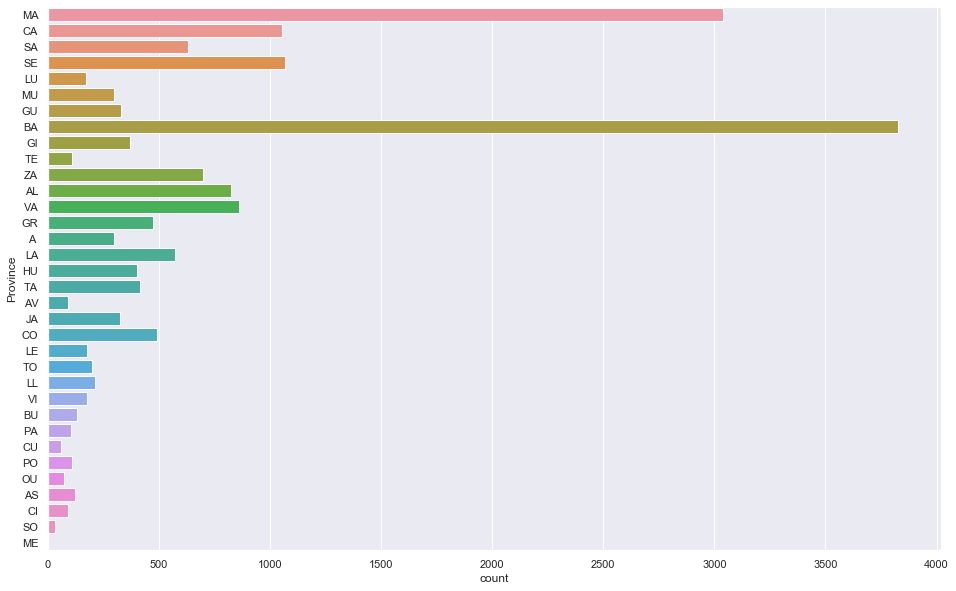

In [59]:
# Check the distribution
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 10))
sns.countplot(y="Province", data=dataset[0])

In [60]:
dataset[0].Province.value_counts()

BA    3827
MA    3040
SE    1069
CA    1056
VA     859
AL     825
ZA     698
SA     632
LA     571
CO     493
GR     472
TA     417
HU     403
GI     370
GU     331
JA     325
A      300
MU     300
LL     214
TO     197
VI     177
LE     175
LU     170
BU     131
AS     123
PO     109
TE     108
PA     106
CI      93
AV      91
OU      71
CU      61
SO      32
ME       2
Name: Province, dtype: int64

In [61]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    19.135
MA    15.200
SE     5.345
CA     5.280
VA     4.295
AL     4.125
ZA     3.490
SA     3.160
LA     2.855
CO     2.465
GR     2.360
TA     2.085
HU     2.015
GI     1.850
GU     1.655
JA     1.625
A      1.500
MU     1.500
LL     1.070
TO     0.985
VI     0.885
LE     0.875
LU     0.850
BU     0.655
AS     0.615
PO     0.545
TE     0.540
PA     0.530
CI     0.465
AV     0.455
OU     0.355
CU     0.305
SO     0.160
ME     0.010
Name: Province, dtype: float64

We have two provinces `BA` and `MA` most frequent than others. We can impute by random values

In [62]:
# We can impute missing values by random on first dataset
s = dataset[0]['Province'].value_counts(normalize=True)
missing = dataset[0]['Province'].isnull()
dataset[0].loc[missing,'Province'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)

In [63]:
# Repite that imputation missing values by random on second dataset
s = dataset[1]['Province'].value_counts(normalize=True)
missing = dataset[1]['Province'].isnull()
dataset[1].loc[missing,'Province'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)

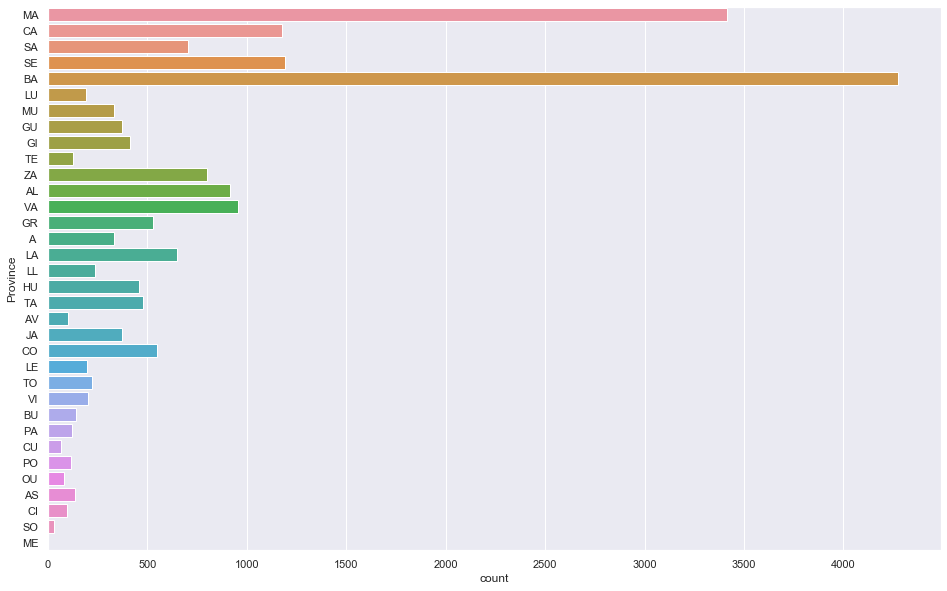

In [64]:
# Check the distribution
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 10))
sns.countplot(y="Province", data=dataset[0])

In [65]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    21.375
MA    17.085
SE     5.965
CA     5.875
VA     4.775
AL     4.580
ZA     3.995
SA     3.515
LA     3.245
CO     2.750
GR     2.655
TA     2.380
HU     2.295
GI     2.075
GU     1.860
JA     1.860
A      1.670
MU     1.655
LL     1.195
TO     1.110
VI     1.005
LE     0.985
LU     0.950
BU     0.715
AS     0.690
TE     0.630
PA     0.610
PO     0.590
AV     0.510
CI     0.475
OU     0.410
CU     0.340
SO     0.160
ME     0.015
Name: Province, dtype: float64

> That imputation is not very good way, but is a good alternative to assign null values by frequency value based on others one.

In [66]:
# Check another categorical variables
missing_zero_values_table(dataset[0])

Your selected dataframe has 34 columns and 20000 Rows.
There are 14 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


## Thoughts about 1st part of Feature Engineering 

We impute missing values on categorical features and transformed some. We have `boolean variables`:
- ADSL
- 3G Devices
and will be considered as categorical and transformed.

## Drop variables

Unfortunately for this first part, we can drop only one variable `Price Sensitivity` for to have more than 70% and we cannot to grouped with another ones.

In [67]:
# Drop `Price Sensitivity`
dataset[0].drop(['Price Sensitivity'], axis=1, inplace=True)
dataset[1].drop(['Price Sensitivity'], axis=1, inplace=True)

* * *
## Binarizing categorical variables

We binarize categorical variables before modeling stage, where `m` are binary variable.

## Save 1st Wrangle and Cleanse data part

To be continued second part for numerical variables

In [68]:
# Save dataset0 and dataset1 for next step: Impute missing values for numerical variable.
dataset[0].to_csv('df2a_1.csv', index=False)
dataset[1].to_csv('df2a_2.csv', index=False)

* * *
### Estimated time to achieve 2a Wrangle and Cleanse data

The Second part has been achieved in `~3 hours`. We made investigation, analysis and transformation tasks.

To be continued with the 3rd part,  `2b - Wrangling & Cleansing data`...